## T1 Time series calculator

In this tutorial, we are going to practice the application of ES (Exponential Smoothing), DES (Double Exponential Smoothing) and TES (Triple Exponential Smoothing) model to a simple set of data. The calculation is based on the formulas in lecture notes. For more large data sets, some Python packages provide built-in functios (i.e., "statsmodels") for training time-series models. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input the model paramters.
a = 0.2
b = 0.2
v = 0.2

In [3]:
# Input the timestamp and the demand data.
T = np.arange(0,8,1) 
D = np.array([25, 120, 40, 60, 30, 140, 60, 80])
print(T)
print(D)

[0 1 2 3 4 5 6 7]
[ 25 120  40  60  30 140  60  80]


### Exponential Smooothing: weighs more on recent data.

In [4]:
F_ES = []

# Initial F0 = D0
F_ES.append(D[0])

# Repeatedly generate new forecasts: F = aD(t-1)+(1-a)F(t-1)
for t in T[1:]:
    f = a*D[t-1] + (1-a)*F_ES[t-1]
    F_ES.append(f)

print(f"Predicted demand:")
print(np.round(F_ES,2))

Predicted demand:
[25.   25.   44.   43.2  46.56 43.25 62.6  62.08]


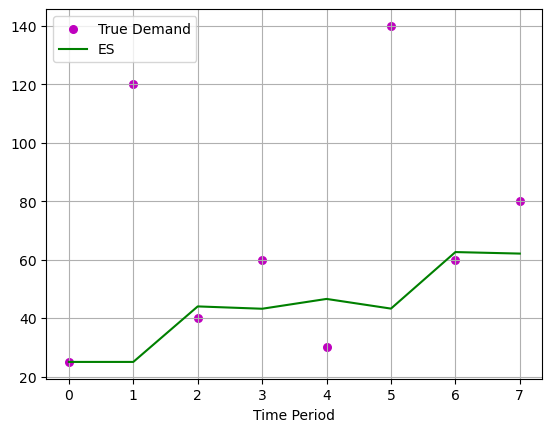

In [5]:
# Plot the result.
plt.scatter(T, D, color = "m",
               marker = "o", s = 30, label="True Demand")
plt.plot(T, F_ES, color = "g", label="ES")
plt.xlabel("Time Period")
plt.legend(loc=2)
plt.grid()
plt.show()

In [6]:
# Calculate the MSE.
SE = (F_ES[1:]-D[1:])**2
MSE = np.sum(SE)/7

print(f"Mean Sqaured Error:")
print(np.round(MSE,2))

Mean Sqaured Error:
2755.19


### Double Exponential Smooothing: capture the trend.

In [7]:
S = []
G = []
F_DES = []

S.append(D[0]) # Initial S0 = D0.
G.append(0) # Initial G0 = 0.
F_DES.append(S[0]+G[0]) # Initial F0 = S0 + G0

In [8]:
for t in T[1:]:
    f = S[t-1] + G[t-1]
    F_DES.append(f)
    
    s = a*D[t] + (1-a)*(S[t-1]+G[t-1])
    g = b*(s-S[t-1]) + (1-b)*G[t-1]
    S.append(s)
    G.append(g)
    
print(f"Predicted demand:")
print(np.round(F_DES,2))

Predicted demand:
[25.   25.   47.8  49.73 55.68 53.42 77.07 79.31]


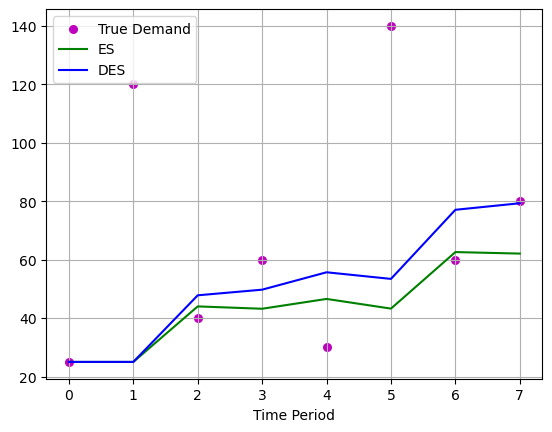

In [9]:
# Plot the result.
plt.scatter(T, D, color = "m",
               marker = "o", s = 30, label="True Demand")
plt.plot(T, F_ES, color = "g", label="ES")
plt.plot(T, F_DES, color = "b", label="DES")
plt.xlabel("Time Period")
plt.legend(loc=2)
plt.grid()
plt.show()

In [10]:
# Calculate the MSE.
SE = (F_DES[1:]-D[1:])**2
MSE = np.sum(SE)/7

print(f"Mean Sqaured Error:")
print(np.round(MSE,2))

Mean Sqaured Error:
2519.91


### Triple Exponential Smooothing: capture the seasonality.

In [11]:
# Initialize the level and the trend factor.
v1 = np.sum(D[:4])/4
v2 = np.sum(D[4:])/4
print(v1,v2)

g0 = (v2-v1)/4
s0 = v2+g0*(4-1)/2
print(g0,s0)

61.25 77.5
4.0625 83.59375


In [12]:
# Initialize the seasonal factors.
C = []

for j in np.arange(1,5,1):
    c1 = D[j-1]/(v1-(5/2-j)*g0)
    c2 = D[j-1+4]/(v2-(5/2-j)*g0)
    C.append((c1+c2)/2)
    
print(np.round(C,2))

[0.44 1.94 0.69 0.92]


In [13]:
# Normalize the seasonal factors.
C_norm = []
C_sum = np.sum(C)

for j in np.arange(1,5,1):
    C_norm.append(C[j-1]*4/C_sum)
    
print(np.round(C_norm,2))

[0.44 1.94 0.69 0.93]


In [14]:
# Make the forecast: F(t,t+j) = (S+jG)c(t+j-N)
F_TES = []

for j in np.arange(1,5,1):
    f = (s0+j*g0)*C_norm[j-1]
    F_TES.append(f)
    
print(np.round(F_TES,2))

[ 38.33 178.24  66.49  92.38]


In [15]:
# For fair comparison,data for the next season is given.
T_new = np.arange(8,12,1)
D_new = np.array([35, 150, 55, 90])

In [16]:
# Calculate the MSE.
SE = (F_TES-D_new)**2
MSE = np.sum(SE)/4

print(f"Mean Sqaured Error:")
print(np.round(MSE,2))

Mean Sqaured Error:
236.55


In [17]:
F_ES_new = []
for t in T_new:
    f = a*D[7] + (1-a)*F_ES[7]
    F_ES_new.append(f)

F_DES_new = []
for t in T_new:
    f = S[7] + (t-7)*G[7]
    F_DES_new.append(f)
    
print(f"Predicted demand from ES model:")
print(np.round(F_ES_new,2))

print(f"Predicted demand from DES model:")
print(np.round(F_DES_new,2))

Predicted demand from ES model:
[65.66 65.66 65.66 65.66]
Predicted demand from DES model:
[ 85.13  90.81  96.49 102.17]


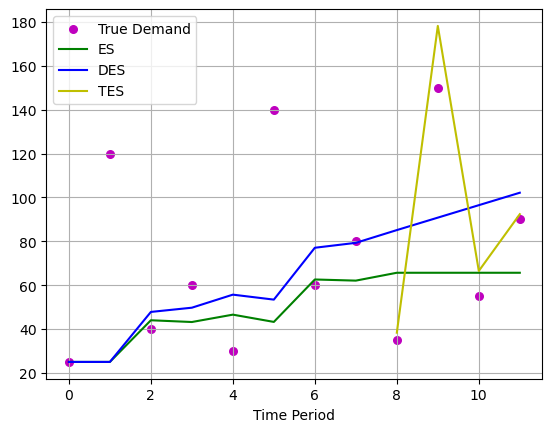

In [18]:
# Compare the result: which model best fits the data?
plt.scatter(np.concatenate((T,T_new)), np.concatenate((D,D_new)), color = "m",
               marker = "o", s = 30, label="True Demand")

plt.plot(np.concatenate((T,T_new)), np.concatenate((F_ES,F_ES_new)), color = "g", label="ES")

plt.plot(np.concatenate((T,T_new)), np.concatenate((F_DES,F_DES_new)), color = "b", label="DES")

plt.plot(T_new, F_TES, color = "y", label="TES")
plt.xlabel("Time Period")
plt.legend(loc=2)
plt.grid()
plt.show()